In [12]:
# import
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest

In [13]:
# raw dataset
bottle = pd.read_csv('Bottle90.csv')
bottle

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,ChlorA,Time,Lat,Lon,Cruise,Rpt_Line,Rpt_Sta
0,31061,0,14.500,33.3800,7.300,5.34,732718.482639,33.49500,-117.748333,200602,90,27.7
1,31061,2,14.500,33.3850,7.300,5.34,732718.482639,33.49500,-117.748333,200602,90,27.7
2,31061,5,14.490,33.3850,7.290,5.26,732718.482639,33.49500,-117.748333,200602,90,27.7
3,31061,10,14.420,33.3850,7.310,6.40,732718.482639,33.49500,-117.748333,200602,90,27.7
4,31061,16,14.320,33.3850,7.100,6.96,732718.482639,33.49500,-117.748333,200602,90,27.7
...,...,...,...,...,...,...,...,...,...,...,...,...
20741,35255,320,7.832,34.0129,2.560,NaN,737736.887280,30.41782,-123.998000,201911,90,120.0
20742,35255,380,7.001,34.0767,1.533,NaN,737736.887280,30.41782,-123.998000,201911,90,120.0
20743,35255,400,6.622,34.0749,1.398,NaN,737736.887280,30.41782,-123.998000,201911,90,120.0
20744,35255,440,6.276,34.1120,0.978,NaN,737736.887280,30.41782,-123.998000,201911,90,120.0


In [14]:
# filter out 2019
bottle_2019 = bottle[(bottle.get('Cruise') >= 201900) & (bottle.get('Rpt_Line') == 90)]
bottle_2019 = bottle_2019.dropna()

# Latitude and Longitude
lat = bottle_2019['Lat'].values
lon = bottle_2019['Lon'].values
depth = bottle_2019['Depthm'].values
max_lat = lat.max()
min_lat = lat.min()
max_lon = lon.max()
min_lon = lon.min()
max_lat, min_lat, max_lon, min_lon

(33.49438, 30.4148, -117.74578000000001, -124.00166999999999)

In [15]:
# convert time
def convert(time):
    return pd.to_datetime(int(time - 719529), unit = 'D')

bottle_2019 = bottle_2019.assign(Time = bottle_2019.get('Time').apply(convert))
bottle_2019

,Cst_Cnt,Depthm,T_degC,Salnty,O2ml_L,ChlorA,Time,Lat,Lon,Cruise,Rpt_Line,Rpt_Sta
19349,35050,0,15.616,33.6271,5.696,0.468,2019-02-07,33.48117,-117.770,201902,90,28.0
19350,35050,2,15.616,33.6271,5.696,0.468,2019-02-07,33.48117,-117.770,201902,90,28.0
19351,35050,10,15.620,33.6270,5.695,0.460,2019-02-07,33.48117,-117.770,201902,90,28.0
19352,35050,20,15.621,33.6309,5.690,0.463,2019-02-07,33.48117,-117.770,201902,90,28.0
19353,35050,30,15.532,33.6397,5.632,0.432,2019-02-07,33.48117,-117.770,201902,90,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20732,35255,140,12.471,33.7836,4.912,0.068,2019-11-07,30.41782,-123.998,201911,90,120.0
20733,35255,150,12.164,33.7729,4.890,0.054,2019-11-07,30.41782,-123.998,201911,90,120.0
20734,35255,170,10.857,33.7619,4.514,0.025,2019-11-07,30.41782,-123.998,201911,90,120.0
20735,35255,200,9.889,33.8395,4.064,0.010,2019-11-07,30.41782,-123.998,201911,90,120.0


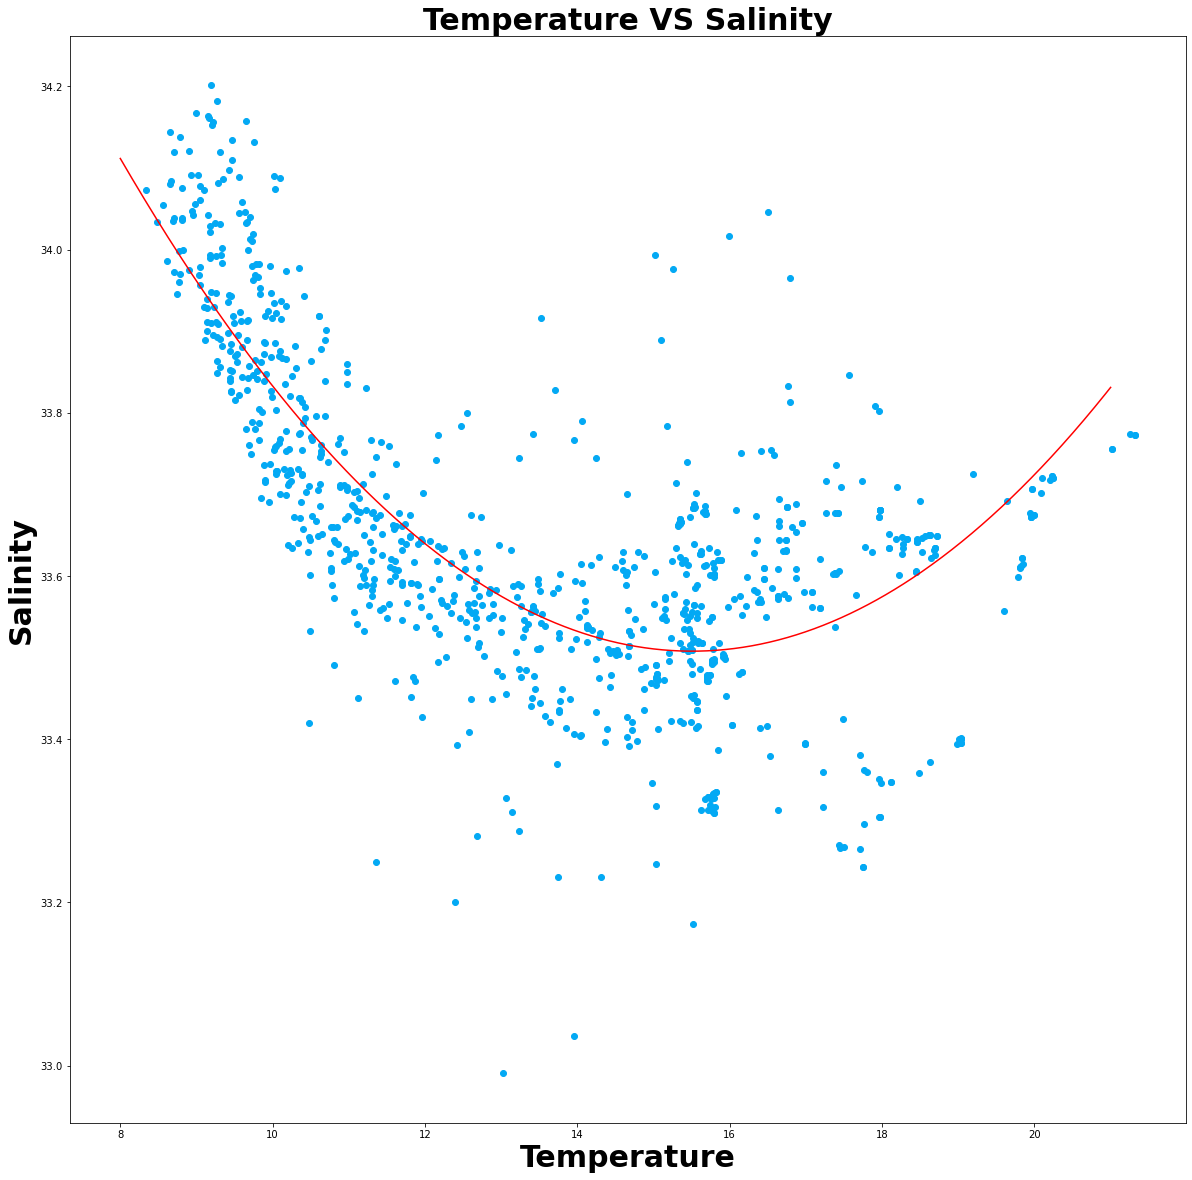

In [16]:
model = np.poly1d(np.polyfit(bottle_2019['T_degC'], bottle_2019['Salnty'], 2))
polyline = np.linspace(8, 21, 1000)
plt.scatter(bottle_2019['T_degC'], bottle_2019['Salnty'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Temperature VS Salinity', fontweight='bold', size = 30)
plt.xlabel('Temperature', fontweight='bold', size = 30)
plt.ylabel('Salinity', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

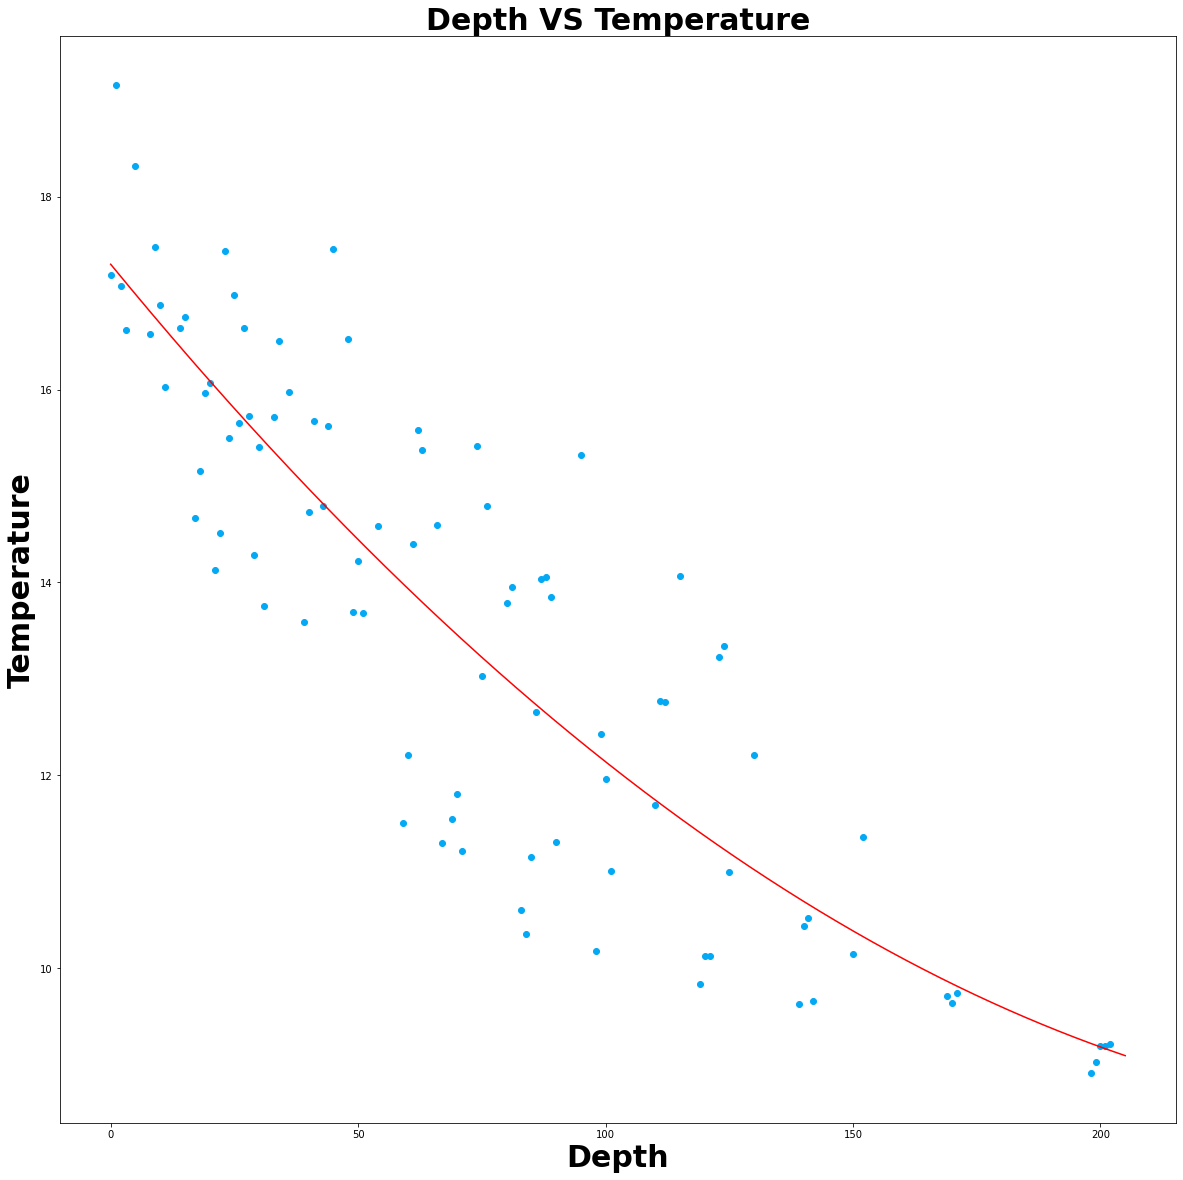

In [17]:
dept_temp = bottle_2019.groupby('Depthm').mean().reset_index()
model = np.poly1d(np.polyfit(dept_temp['Depthm'], dept_temp['T_degC'], 2))
polyline = np.linspace(0, 205, 1000)
plt.scatter(dept_temp['Depthm'], dept_temp['T_degC'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Depth VS Temperature', fontweight='bold', size = 30)
plt.xlabel('Depth', fontweight='bold', size = 30)
plt.ylabel('Temperature', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

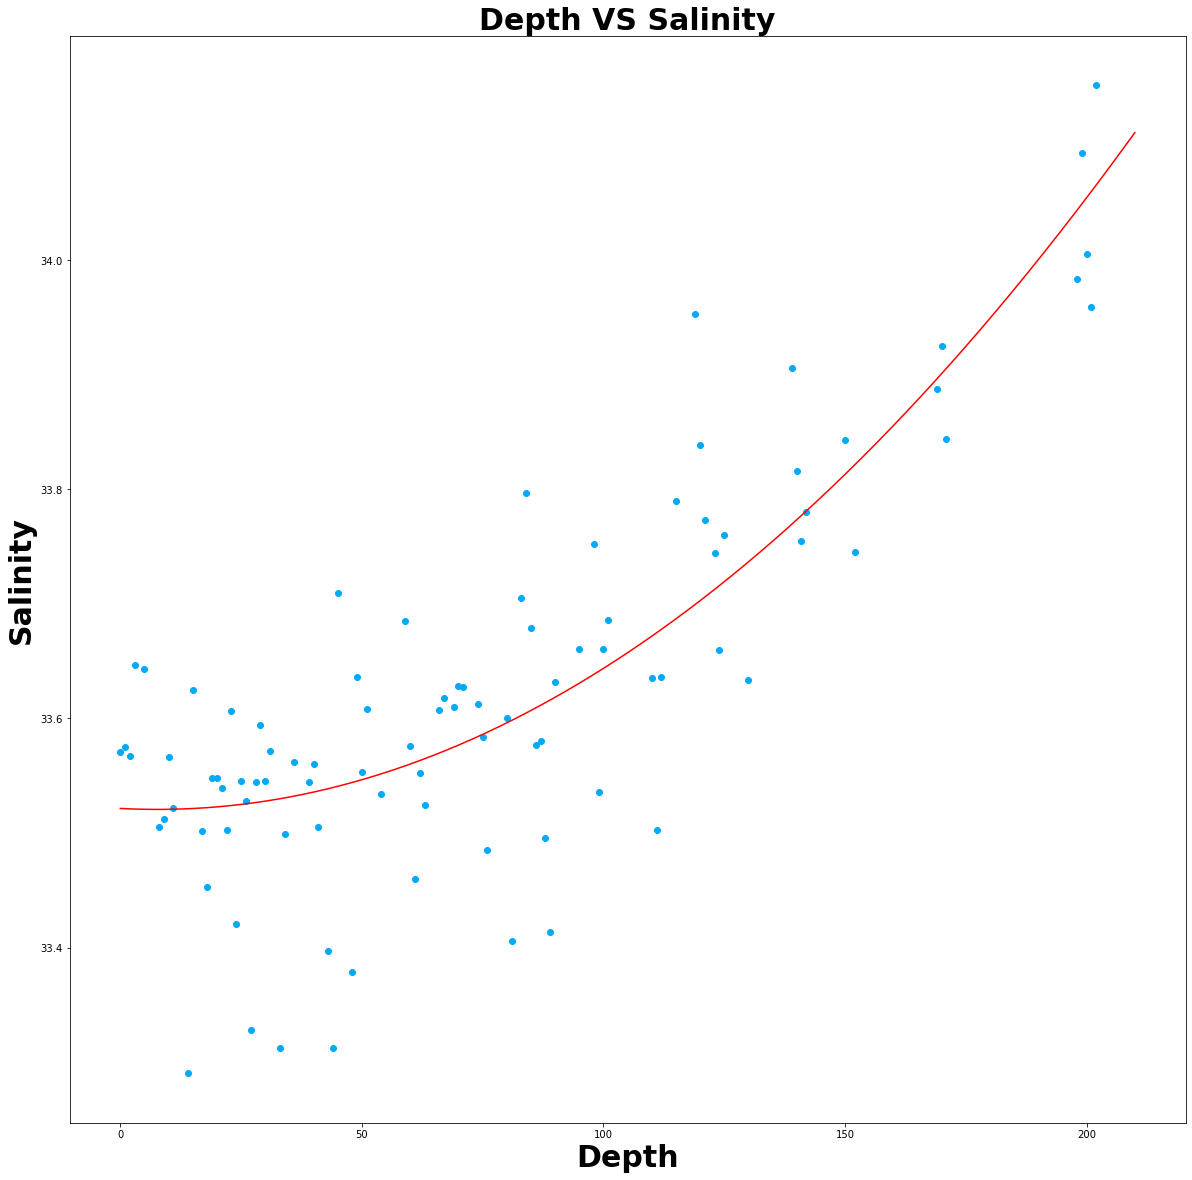

In [18]:
model = np.poly1d(np.polyfit(dept_temp['Depthm'], dept_temp['Salnty'], 2))
polyline = np.linspace(0, 210, 1000)
plt.scatter(dept_temp['Depthm'], dept_temp['Salnty'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Depth VS Salinity', fontweight='bold', size = 30)
plt.xlabel('Depth', fontweight='bold', size = 30)
plt.ylabel('Salinity', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

In [19]:
outcome, predictors = patsy.dmatrices('Depthm ~ T_degC + Salnty', bottle_2019)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Depthm   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1378.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          3.06e-280
Time:                        10:18:08   Log-Likelihood:                -4539.4
No. Observations:                 943   AIC:                             9085.
Df Residuals:                     940   BIC:                             9099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2851.5461    209.872    -13.587      0.0

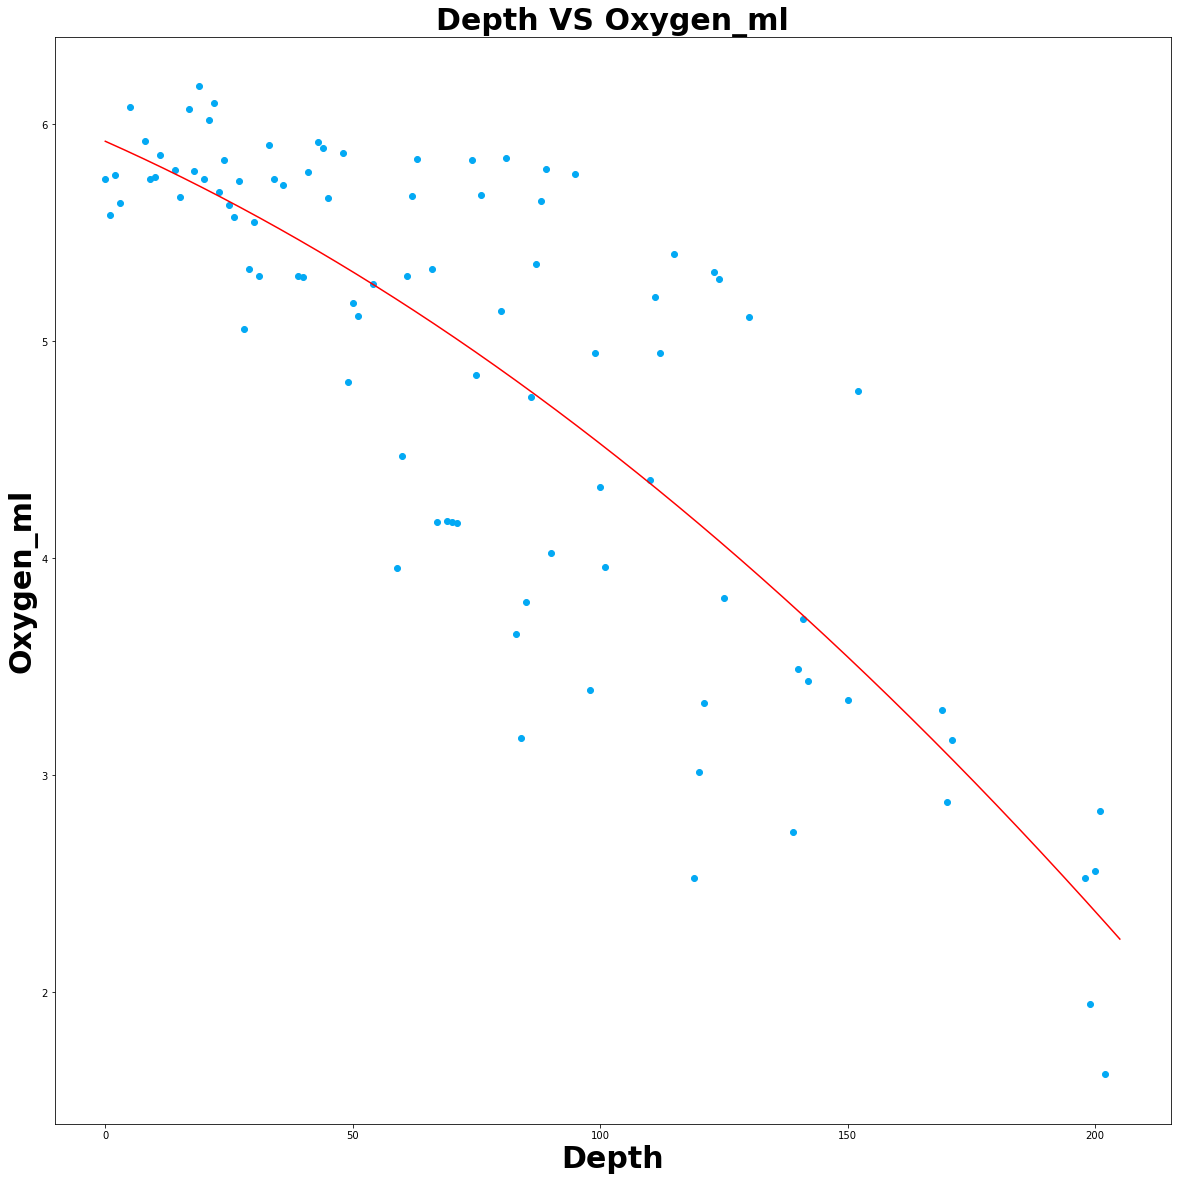

In [20]:
model = np.poly1d(np.polyfit(dept_temp['Depthm'], dept_temp['O2ml_L'], 2))
polyline = np.linspace(0, 205, 1000)
plt.scatter(dept_temp['Depthm'], dept_temp['O2ml_L'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Depth VS Oxygen_ml', fontweight='bold', size = 30)
plt.xlabel('Depth', fontweight='bold', size = 30)
plt.ylabel('Oxygen_ml', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

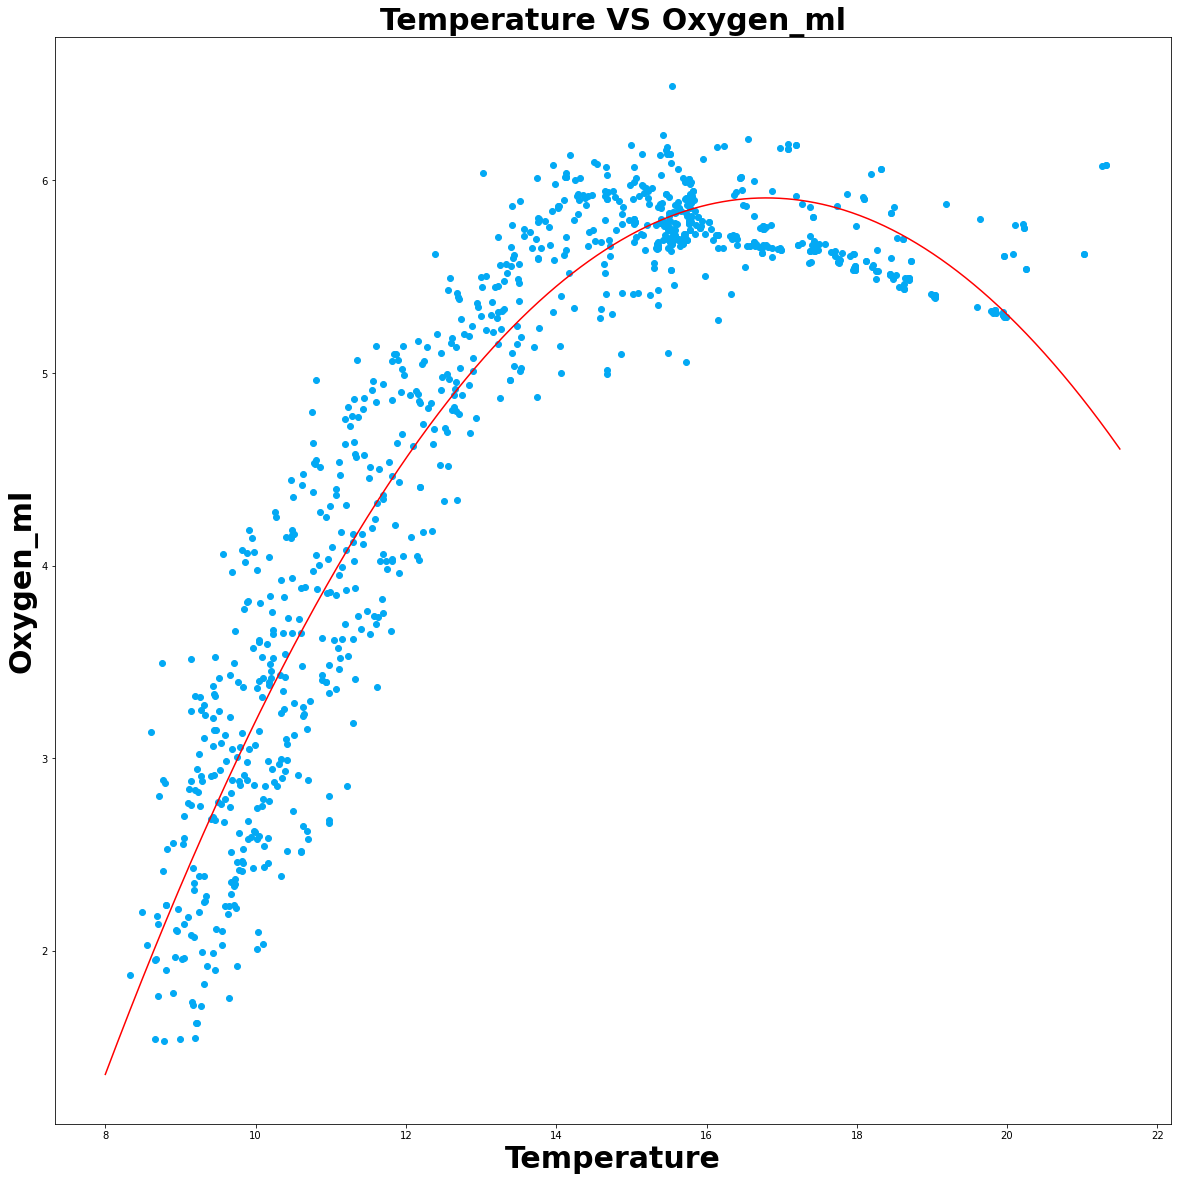

In [21]:
model = np.poly1d(np.polyfit(bottle_2019['T_degC'], bottle_2019['O2ml_L'], 2))
polyline = np.linspace(8, 21.5, 1000)
plt.scatter(bottle_2019['T_degC'], bottle_2019['O2ml_L'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Temperature VS Oxygen_ml', fontweight='bold', size = 30)
plt.xlabel('Temperature', fontweight='bold', size = 30)
plt.ylabel('Oxygen_ml', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

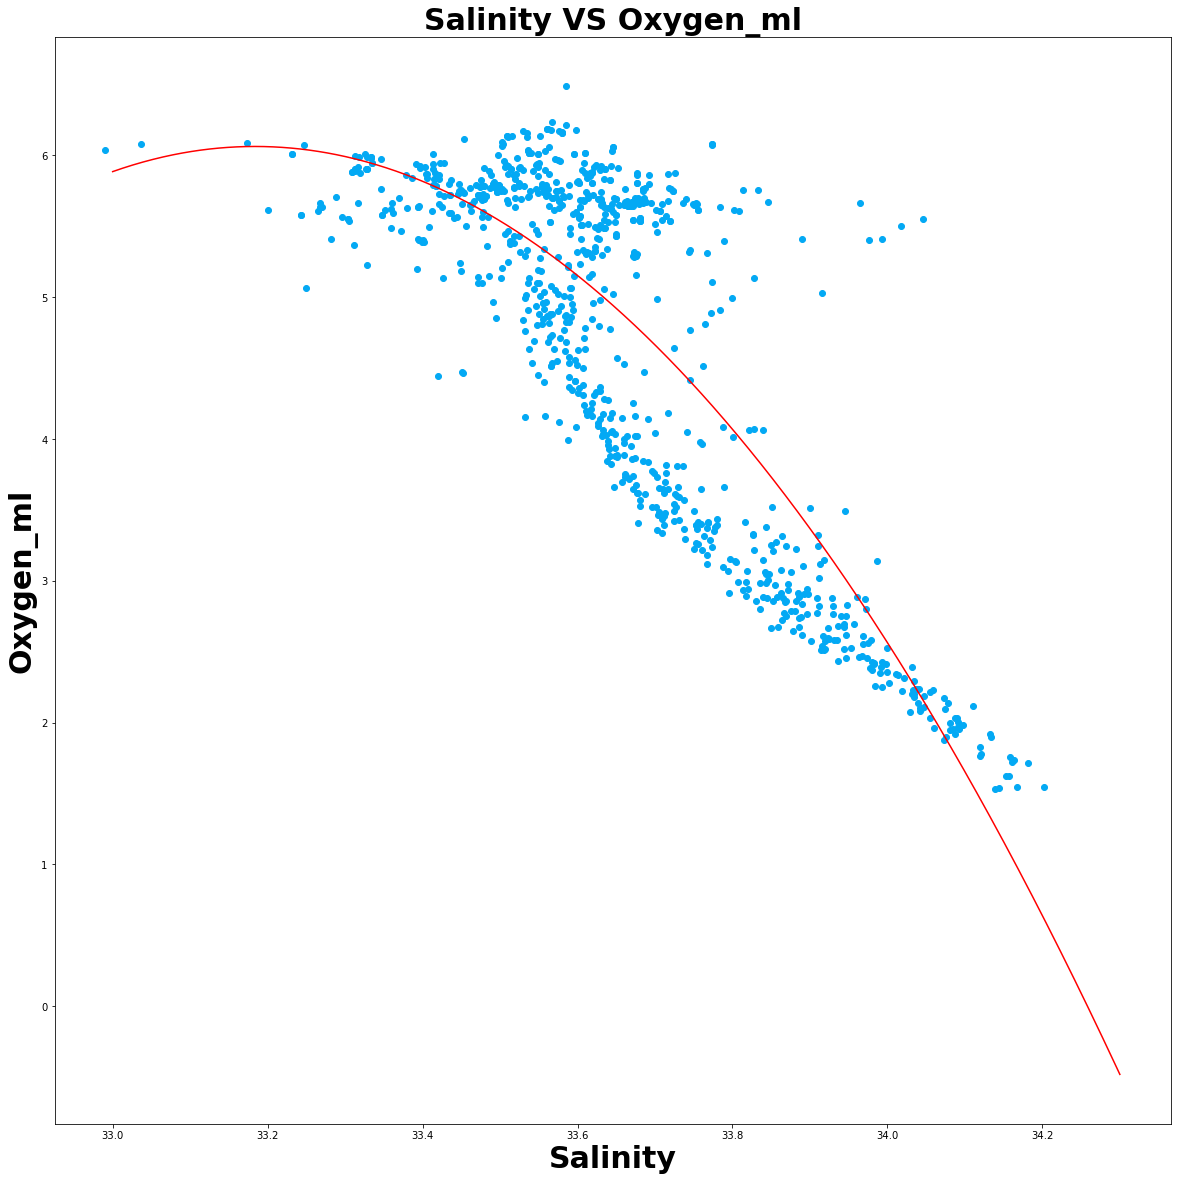

In [22]:
model = np.poly1d(np.polyfit(bottle_2019['Salnty'], bottle_2019['O2ml_L'], 2))
polyline = np.linspace(33, 34.3, 1000)
plt.scatter(bottle_2019['Salnty'], bottle_2019['O2ml_L'], c = '#03a9f4')
plt.plot(polyline, model(polyline), c = '#FF0000')
plt.title('Salinity VS Oxygen_ml', fontweight='bold', size = 30)
plt.xlabel('Salinity', fontweight='bold', size = 30)
plt.ylabel('Oxygen_ml', fontweight='bold', size = 30)
plt.gcf().set_size_inches((20, 20))
plt.show()

In [23]:
outcome1, predictors1 = patsy.dmatrices('O2ml_L ~ T_degC + Salnty + Depthm', bottle_2019)
mod1 = sm.OLS(outcome1, predictors1)
res1 = mod1.fit() 
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 O2ml_L   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2042.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:19:35   Log-Likelihood:                -620.21
No. Observations:                 943   AIC:                             1248.
Df Residuals:                     939   BIC:                             1268.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.7008      3.599     31.316      0.0